In [5]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census
from config import gkey

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

gmaps.configure(api_key=gkey)


In [7]:
file = "../Resources/Austin Data Set CSV.csv"
base_df = pd.read_csv(file)

base_df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [8]:
mask = base_df.city == 'austin'
newDf = base_df[mask].reset_index()
newDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15020 entries, 0 to 15019
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       15020 non-null  int64  
 1   zpid                        15020 non-null  int64  
 2   city                        15020 non-null  object 
 3   streetAddress               15020 non-null  object 
 4   zipcode                     15020 non-null  int64  
 5   description                 15020 non-null  object 
 6   latitude                    15020 non-null  float64
 7   longitude                   15020 non-null  float64
 8   propertyTaxRate             15020 non-null  float64
 9   garageSpaces                15020 non-null  int64  
 10  hasAssociation              15020 non-null  bool   
 11  hasCooling                  15020 non-null  bool   
 12  hasGarage                   15020 non-null  bool   
 13  hasHeating                  150

In [9]:
mask = newDf.lotSizeSqFt != 1508482800.0
cleanDf = newDf[mask]
cleanDf.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15019.000000,1.501900e+04,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,1.501900e+04,...,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000
mean,7645.484853,1.034826e+08,78736.921433,30.292187,-97.779470,1.994193,1.230441,1.225714,1988.347160,5.147095e+05,...,0.048805,1.035888,0.976896,1.840638,5.799901,1235.715361,14.866236,2.683431,3.439843,1.468274
std,4351.997721,3.169948e+08,15.841007,0.096616,0.083836,0.053351,1.351113,1.351738,21.569163,4.542934e+05,...,0.232988,0.264121,0.292056,1.064699,1.852850,326.527599,1.745192,1.055014,0.851327,0.524003
min,17.000000,2.858495e+07,78652.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,3888.500000,2.941047e+07,78727.000000,30.204472,-97.838570,1.980000,0.000000,0.000000,1974.000000,3.100000e+05,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,7655.000000,2.949329e+07,78739.000000,30.285294,-97.770065,1.980000,1.000000,1.000000,1993.000000,4.090000e+05,...,0.000000,1.000000,1.000000,1.566667,6.000000,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,11412.500000,7.033528e+07,78749.000000,30.366622,-97.719181,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,...,0.000000,1.000000,1.000000,2.266667,7.000000,1494.000000,16.000000,3.000000,4.000000,2.000000
max,15170.000000,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,...,2.000000,3.000000,2.000000,7.700000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [10]:
clean = cleanDf['latestPrice']
quartiles = clean.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mask = cleanDf['latestPrice'] < upper_bound
outlierGoneDf = cleanDf[mask]

Values below -87500.0 could be outliers.
Values above 972500.0 could be outliers.


In [11]:
feature = cleanDf[['propertyTaxRate','livingAreaSqFt','lotSizeSqFt']]
target = cleanDf["latestPrice"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            latestPrice   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     1459.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:03:08   Log-Likelihood:            -2.1503e+05
No. Observations:               15019   AIC:                         4.301e+05
Df Residuals:                   15015   BIC:                         4.301e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.752e+06   1.22e+05     14.357      0.000    1.51e+06    1.99e+06
propertyTaxRate  -7.92e+05   6.13e+04    -12.928      0.000   -9.12e+05   -6.72e+05
livingAreaSqFt    154.8572      2.364     65.507      0.000     150.224     159.491
lotSizeSqFt         0.0163      0.009      1.886      0.059      -0.001       0.033
==============================================================================
Omnibus:                    15240.644   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         89782294.912
Skew:                           3.594   Prob(JB):                         0.00
Kurtosis:                     381.706   Cond. No.                     1.58e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-12-47bf4eb09e10>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


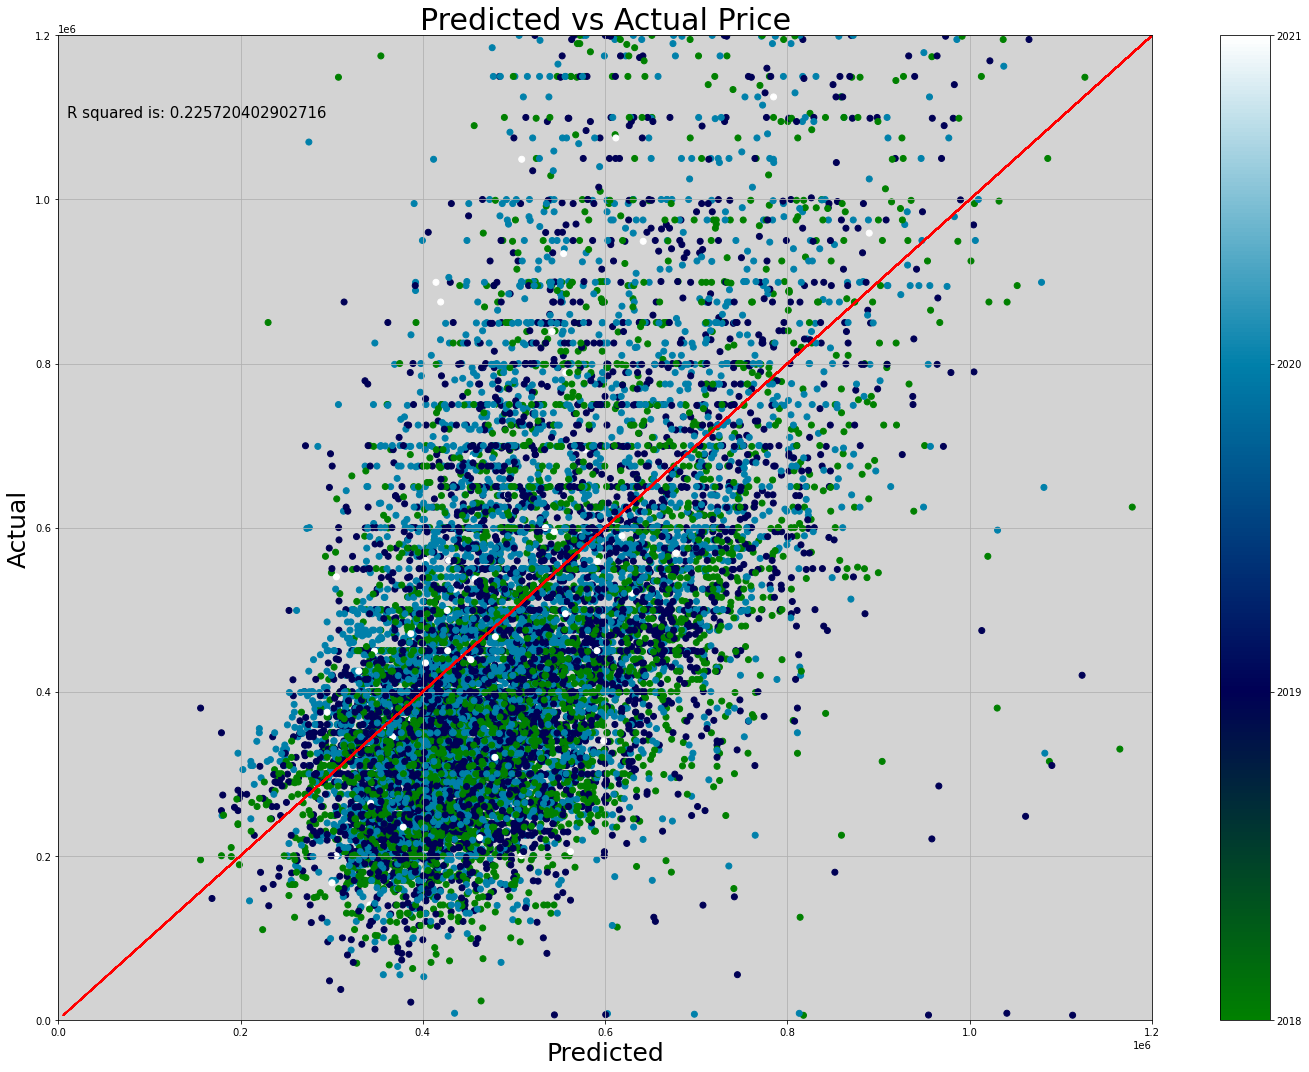

In [12]:
plt.figure(figsize=(20,15))
weight = cleanDf.latest_saleyear
plt.scatter(results.fittedvalues, cleanDf.latestPrice,marker="o",c= weight,cmap='ocean')

plt.xlim(0,1200000)
plt.ylim(0,1200000)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual Price",fontsize=30)
plt.plot(cleanDf.latestPrice, cleanDf.latestPrice,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(10000,1100000),fontsize=15)
plt.colorbar(ticks=[2018,2019,2020,2021])
plt.grid()
ax = plt.axes()
ax.set(facecolor='lightgray')

plt.tight_layout()
plt.show()

<ipython-input-13-89693a88187b>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


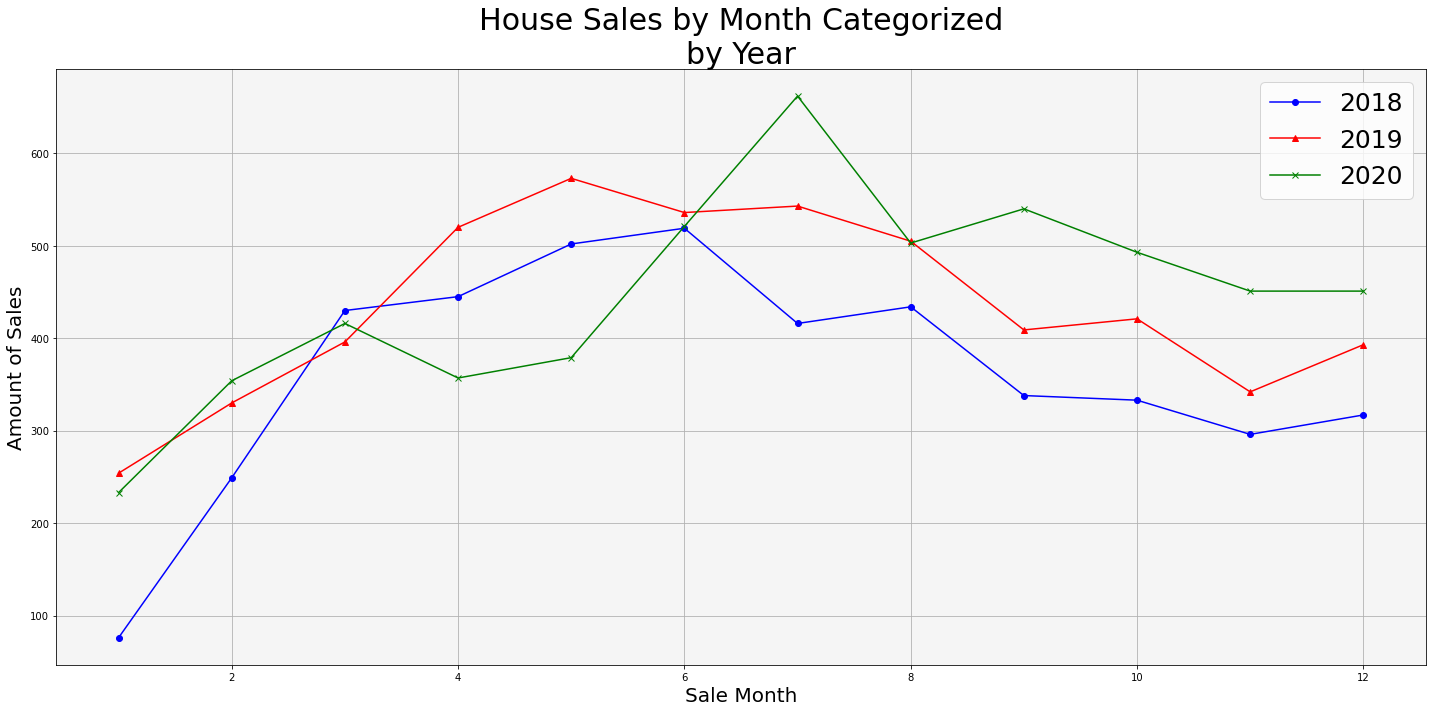

In [13]:
mask = cleanDf["latest_saleyear"] == 2018
sub1 = cleanDf[mask]
sub10 = sub1['latest_salemonth'].value_counts()
sub101 = sub10.sort_index(ascending = True)

mask = cleanDf["latest_saleyear"] == 2019
sub2 = cleanDf[mask]
sub20 = sub2['latest_salemonth'].value_counts()
sub201 = sub20.sort_index(ascending = True)

mask = cleanDf["latest_saleyear"] == 2020
sub3 = cleanDf[mask]
sub30 = sub3['latest_salemonth'].value_counts()
sub301 = sub30.sort_index(ascending = True)

plt.figure(figsize=(20,10))

eighteen, = plt.plot(sub101.index, sub101.values, color="blue", label="2018",marker='o')
nineteen, = plt.plot(sub201.index, sub201.values, color="red", label="2019",marker='^')
twenty, = plt.plot(sub301.index, sub301.values, color="green", label="2020",marker='x')

plt.grid()
plt.title("House Sales by Month Categorized\nby Year",fontsize=30)
plt.xlabel("Sale Month",fontsize=20)
plt.ylabel("Amount of Sales",fontsize=20)
plt.legend(handles=[eighteen,nineteen,twenty ], loc="best",fontsize=25)
ax = plt.axes()
ax.set(facecolor='whitesmoke')
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#months = ['Feb', 'Apr',  'Jun',  'Aug',  'Oct',  'Dec']

#plt.xticks(months)
path = '../output/House_Sales_Month.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-14-d45c12446225>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


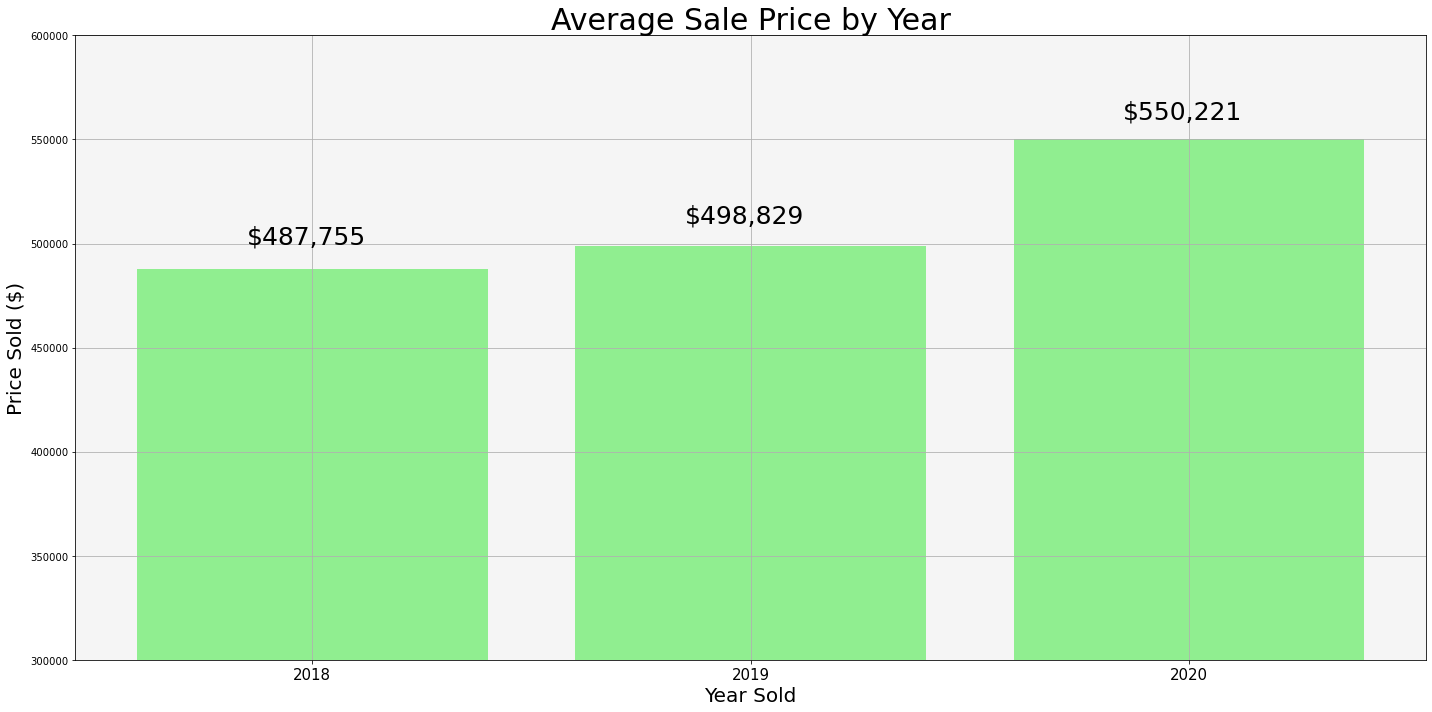

In [14]:
averageSale = cleanDf.groupby(['latest_saleyear']).latestPrice.mean()
mask = averageSale.index != 2021
averageSale = averageSale[mask]
averageSale

mask = averageSale.index == 2018
eightAverage = averageSale[mask]
mean1 ="${:,.0f}".format(eightAverage.values[0])

mask = averageSale.index == 2019
nineAverage = averageSale[mask]
mean2 = "${:,.0f}".format(nineAverage.values[0])

mask = averageSale.index == 2020
zeroAverage = averageSale[mask]
mean3 = "${:,.0f}".format(zeroAverage.values[0])


plt.figure(figsize=(20,10))
plt.bar(averageSale.index,averageSale.values,color='lightgreen')
plt.title('Average Sale Price by Year',fontsize=30)
plt.xlabel('Year Sold',fontsize=20)
plt.ylabel('Price Sold ($)',fontsize=20)
plt.ylim(300000,600000)
plt.grid()
plt.xticks([2018,2019,2020],fontsize=15)
plt.annotate(f'{mean1}',(2017.85,500000),fontsize=25)
plt.annotate(f'{mean2}',(2018.85,510000),fontsize=25)
plt.annotate(f'{mean3}',(2019.85,560000),fontsize=25)
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/Average_Price_Year.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-15-33dc7ee01cad>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


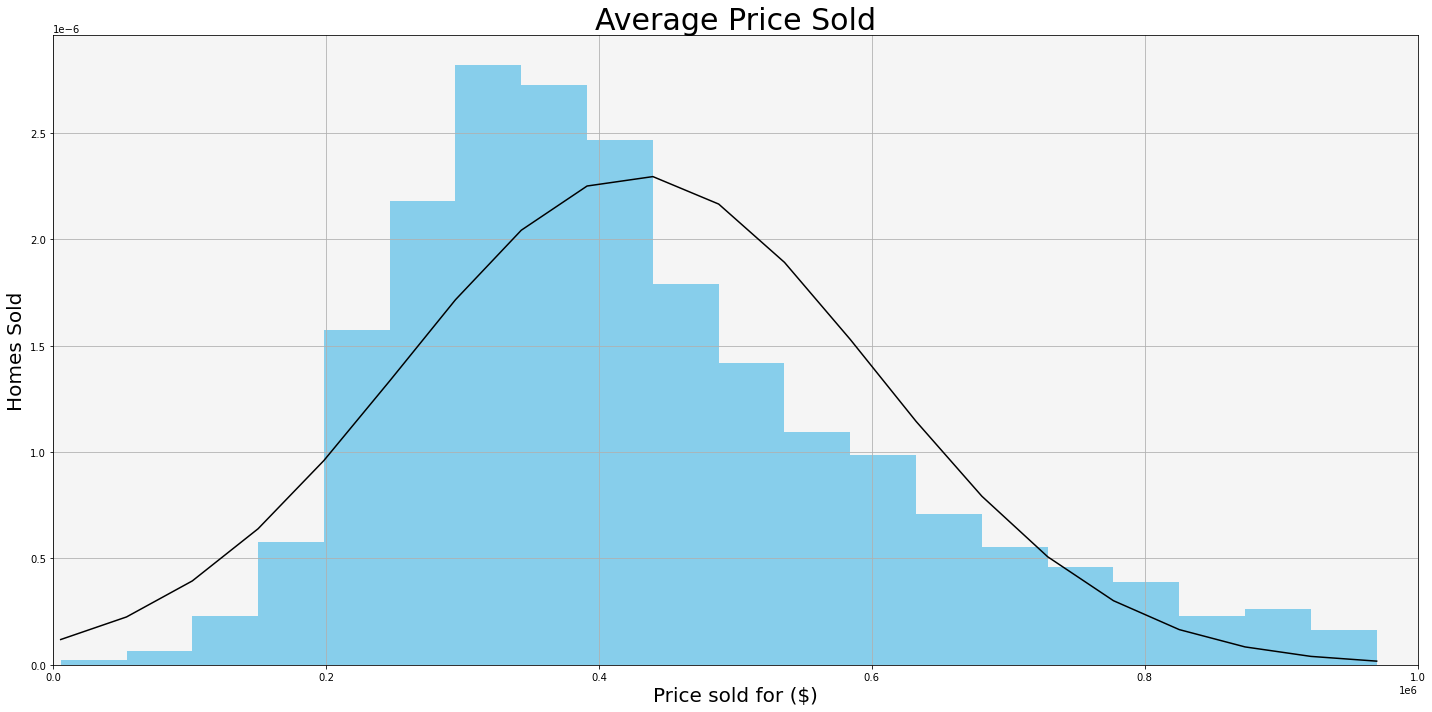

In [15]:
clean = cleanDf['latestPrice']
quartiles = clean.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


mask = cleanDf['latestPrice'] < upper_bound
outlierGoneDf = cleanDf[mask]



plt.figure(figsize=(20,10))
plt.title('Average Price Sold',fontsize=30)
plt.xlabel('Price sold for ($)',fontsize=20)
plt.ylabel('Homes Sold',fontsize=20)
plt.xlim(0,1000000)
plt.grid()


_, bins, _ = plt.hist(outlierGoneDf.latestPrice, 20,density=1, color='skyblue')
mu, sigma = norm.fit(outlierGoneDf.latestPrice)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/Average_Price_Histogram.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

In [16]:
cleanDf.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15019.000000,1.501900e+04,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,1.501900e+04,...,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000
mean,7645.484853,1.034826e+08,78736.921433,30.292187,-97.779470,1.994193,1.230441,1.225714,1988.347160,5.147095e+05,...,0.048805,1.035888,0.976896,1.840638,5.799901,1235.715361,14.866236,2.683431,3.439843,1.468274
std,4351.997721,3.169948e+08,15.841007,0.096616,0.083836,0.053351,1.351113,1.351738,21.569163,4.542934e+05,...,0.232988,0.264121,0.292056,1.064699,1.852850,326.527599,1.745192,1.055014,0.851327,0.524003
min,17.000000,2.858495e+07,78652.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,3888.500000,2.941047e+07,78727.000000,30.204472,-97.838570,1.980000,0.000000,0.000000,1974.000000,3.100000e+05,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,7655.000000,2.949329e+07,78739.000000,30.285294,-97.770065,1.980000,1.000000,1.000000,1993.000000,4.090000e+05,...,0.000000,1.000000,1.000000,1.566667,6.000000,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,11412.500000,7.033528e+07,78749.000000,30.366622,-97.719181,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,...,0.000000,1.000000,1.000000,2.266667,7.000000,1494.000000,16.000000,3.000000,4.000000,2.000000
max,15170.000000,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,...,2.000000,3.000000,2.000000,7.700000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [17]:
mask = cleanDf['latitude'] >=  30.292187
northDf = cleanDf[mask]
northDf.describe()

mask = cleanDf['latitude'] <  30.292187
southDf = cleanDf[mask]
southDf.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,7739.000000,7.739000e+03,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7.739000e+03,...,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000,7739.000000
mean,7973.359607,1.231989e+08,78735.400956,30.210950,-97.805963,1.982105,1.205582,1.201835,1991.391911,4.719143e+05,...,0.017961,1.019382,0.949735,1.894445,5.344570,1210.283499,14.762243,2.609478,3.363225,1.451350
std,3963.196936,3.550312e+08,15.827869,0.040344,0.085305,0.007663,1.373508,1.373828,21.994008,3.457176e+05,...,0.132818,0.152980,0.266955,1.155190,1.804647,372.858921,1.919366,0.986480,0.812952,0.524957
min,19.000000,2.858495e+07,78652.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,6.000000e+03,...,0.000000,0.000000,0.000000,0.200000,2.666667,396.000000,10.000000,0.000000,0.000000,1.000000
25%,5028.500000,2.947868e+07,78725.000000,30.180850,-97.859131,1.980000,0.000000,0.000000,1978.000000,2.994950e+05,...,0.000000,1.000000,1.000000,1.133333,3.666667,887.000000,14.000000,2.000000,3.000000,1.000000
50%,7378.000000,2.950903e+07,78744.000000,30.205919,-97.804573,1.980000,1.000000,1.000000,1998.000000,3.899000e+05,...,0.000000,1.000000,1.000000,1.533333,5.000000,1298.000000,15.000000,3.000000,3.000000,1.000000
75%,12025.500000,8.008085e+07,78747.000000,30.242263,-97.748875,1.980000,2.000000,2.000000,2008.000000,5.249000e+05,...,0.000000,1.000000,1.000000,2.300000,6.666667,1506.000000,16.000000,3.000000,4.000000,2.000000
max,15170.000000,2.145703e+09,78749.000000,30.292158,-97.569504,2.010000,22.000000,22.000000,2020.000000,4.850000e+06,...,1.000000,3.000000,2.000000,7.700000,9.500000,1755.000000,19.000000,10.000000,10.000000,4.000000


In [18]:
mask = northDf['longitude'] >= -97.751307
northEast = northDf[mask]
northEast.describe()

mask = northDf['longitude'] < -97.751307
northWest = northDf[mask]
northWest.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,3357.000000,3.357000e+03,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3.357000e+03,...,3357.00000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000
mean,5729.409592,8.242724e+07,78733.434316,30.389617,-97.812936,2.025699,1.426273,1.420614,1991.893059,7.443449e+05,...,0.14090,1.120643,0.904081,1.986688,7.577687,1432.881144,15.720286,3.293864,3.846291,1.670837
std,5076.734246,2.642454e+08,13.745589,0.056936,0.053372,0.091787,1.400771,1.402162,16.515592,7.265312e+05,...,0.34797,0.493745,0.294524,0.981944,1.003001,141.654635,1.299623,1.222414,0.847538,0.506005
min,17.000000,2.933355e+07,78703.000000,30.292412,-97.932671,1.980000,0.000000,0.000000,1929.000000,5.500000e+03,...,0.00000,0.000000,0.000000,0.433333,5.333333,1153.000000,12.000000,0.000000,0.000000,1.000000
25%,1422.000000,2.935545e+07,78729.000000,30.345757,-97.859779,1.980000,0.000000,0.000000,1982.000000,4.199000e+05,...,0.00000,1.000000,1.000000,1.233333,7.000000,1332.000000,16.000000,3.000000,3.000000,1.000000
50%,3693.000000,2.937257e+07,78731.000000,30.376446,-97.791710,1.980000,2.000000,2.000000,1995.000000,5.750000e+05,...,0.00000,1.000000,1.000000,1.866667,7.666667,1476.000000,16.000000,3.000000,4.000000,2.000000
75%,8546.000000,6.701104e+07,78735.000000,30.433832,-97.767242,1.980000,2.000000,2.000000,2005.000000,8.000000e+05,...,0.00000,1.000000,1.000000,2.466667,8.333333,1533.000000,16.000000,4.000000,4.000000,2.000000
max,15061.000000,2.146313e+09,78759.000000,30.513170,-97.751320,2.210000,9.000000,9.000000,2020.000000,1.350000e+07,...,1.00000,3.000000,1.000000,5.766667,9.333333,1807.000000,17.000000,27.000000,7.000000,4.000000


In [19]:
mask = southDf['longitude'] >= -97.805963
southEast = southDf[mask]
southEast.describe()


mask = southDf['longitude'] < -97.805963
southWest = southDf[mask]
southWest.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,3825.000000,3.825000e+03,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3.825000e+03,...,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000
mean,7918.599216,9.805779e+07,78743.196340,30.196610,-97.874022,1.984259,1.296209,1.290980,1996.831111,4.696250e+05,...,0.013072,1.041569,0.888627,2.179460,6.337896,1362.611765,15.969150,2.874967,3.600523,1.508758
std,3948.095569,2.822263e+08,5.565593,0.030328,0.053526,0.010472,1.450490,1.451008,12.818341,3.152270e+05,...,0.113598,0.209846,0.314634,1.363173,1.731993,336.963227,1.530236,0.975814,0.747310,0.506742
min,470.000000,2.858495e+07,78652.000000,30.129955,-98.022057,1.980000,0.000000,0.000000,1907.000000,8.000000e+03,...,0.000000,0.000000,0.000000,0.200000,3.333333,678.000000,12.000000,0.000000,0.000000,1.000000
25%,4914.000000,2.949405e+07,78737.000000,30.175011,-97.897362,1.980000,0.000000,0.000000,1986.000000,3.290000e+05,...,0.000000,1.000000,1.000000,1.233333,5.000000,1132.000000,15.000000,2.000000,3.000000,1.000000
50%,6744.000000,2.951371e+07,78745.000000,30.194107,-97.860069,1.980000,2.000000,2.000000,1999.000000,4.070000e+05,...,0.000000,1.000000,1.000000,1.700000,6.000000,1458.000000,16.000000,3.000000,4.000000,2.000000
75%,12414.000000,7.034628e+07,78748.000000,30.212900,-97.833450,1.980000,2.000000,2.000000,2006.000000,5.120000e+05,...,0.000000,1.000000,1.000000,2.900000,8.000000,1640.000000,17.000000,3.000000,4.000000,2.000000
max,15166.000000,2.145703e+09,78749.000000,30.289963,-97.805969,2.010000,20.000000,20.000000,2020.000000,4.850000e+06,...,1.000000,3.000000,1.000000,7.700000,9.500000,1755.000000,19.000000,10.000000,10.000000,3.000000


In [20]:
cleanDf.columns

Index(['index', 'zpid', 'city', 'streetAddress', 'zipcode', 'description',
       'latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

<AxesSubplot:>

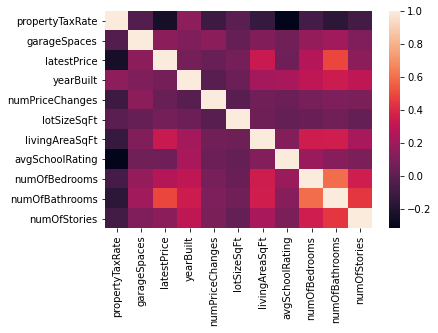

In [21]:
#NorthWest
northWestTrim = northWest[['propertyTaxRate','garageSpaces','latestPrice','yearBuilt','numPriceChanges','lotSizeSqFt','livingAreaSqFt','avgSchoolRating','numOfBedrooms','numOfBathrooms','numOfStories']]
corr = northWestTrim.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [22]:
#NorthWest
clean = northWest['latestPrice']
quartiles = clean.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


mask = northWest['latestPrice'] < upper_bound
northWestOut = northWest[mask]

feature = northWestOut[['propertyTaxRate','livingAreaSqFt','lotSizeSqFt','numPriceChanges','numOfStories','numOfBedrooms','numOfBathrooms']]
target = northWestOut["latestPrice"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            latestPrice   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     244.9
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          2.13e-290
Time:                        17:05:55   Log-Likelihood:                -42096.
No. Observations:                3090   AIC:                         8.421e+04
Df Residuals:                    3082   BIC:                         8.426e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.297e+06   8.18e+04     28.092      0.000    2.14e+06    2.46e+06
propertyTaxRate -9.953e+05   3.86e+04    -25.792      0.000   -1.07e+06    -9.2e+05
livingAreaSqFt     11.9176      1.739      6.853      0.000       8.508      15.327
lotSizeSqFt         0.0113      0.019      0.593      0.553      -0.026       0.049
numPriceChanges -8656.0499   1341.865     -6.451      0.000   -1.13e+04   -6025.010
numOfStories    -2.848e+04   8238.869     -3.457      0.001   -4.46e+04   -1.23e+04
numOfBedrooms    2.456e+04   5472.120      4.488      0.000    1.38e+04    3.53e+04
numOfBathrooms   8.582e+04   4436.468     19.345      0.000    7.71e+04    9.45e+04
==============================================================================
Omnibus:                      437.210   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3444.611
Skew:                           0.424   Prob(JB):                         0.00
Kurtosis:                       8.103   Cond. No.                     4.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-23-580b896638a9>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


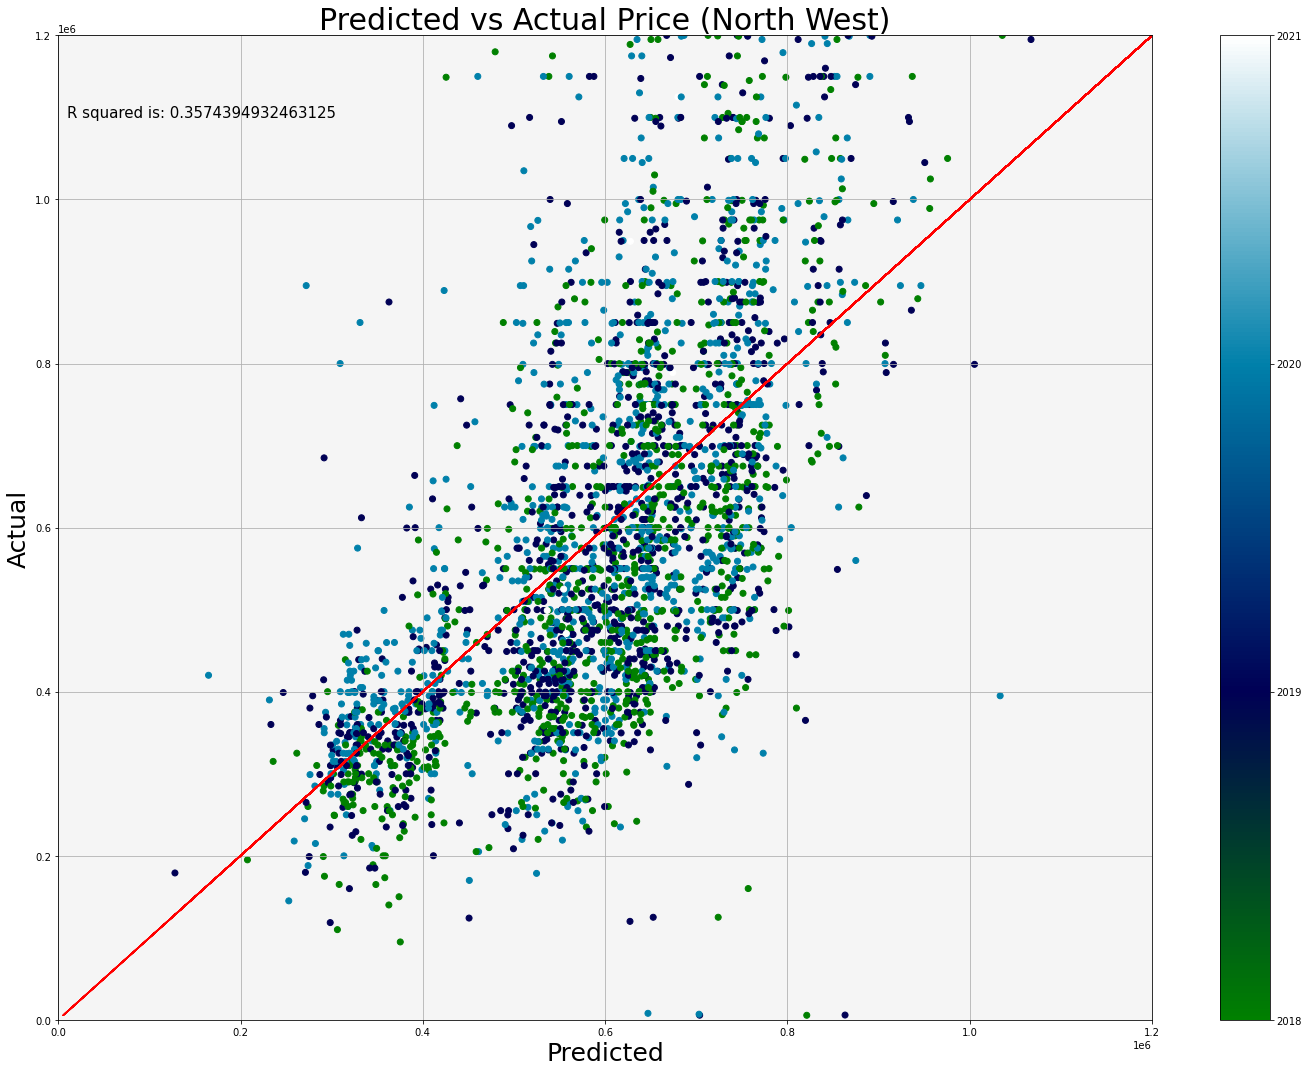

In [23]:
#NorthWest
plt.figure(figsize=(20,15))
weight = northWestOut.latest_saleyear
plt.scatter(results.fittedvalues, northWestOut.latestPrice,marker="o",c= weight,cmap='ocean')

plt.xlim(0,1200000)
plt.ylim(0,1200000)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual Price (North West)",fontsize=30)
plt.plot(northWestOut.latestPrice, northWestOut.latestPrice,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(10000,1100000),fontsize=15)
plt.colorbar(ticks=[2018,2019,2020,2021])
ax = plt.axes()
ax.set(facecolor='whitesmoke')
plt.grid()

path = '../output/NorthWest_Price_Regression.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-24-c86d6a08644c>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


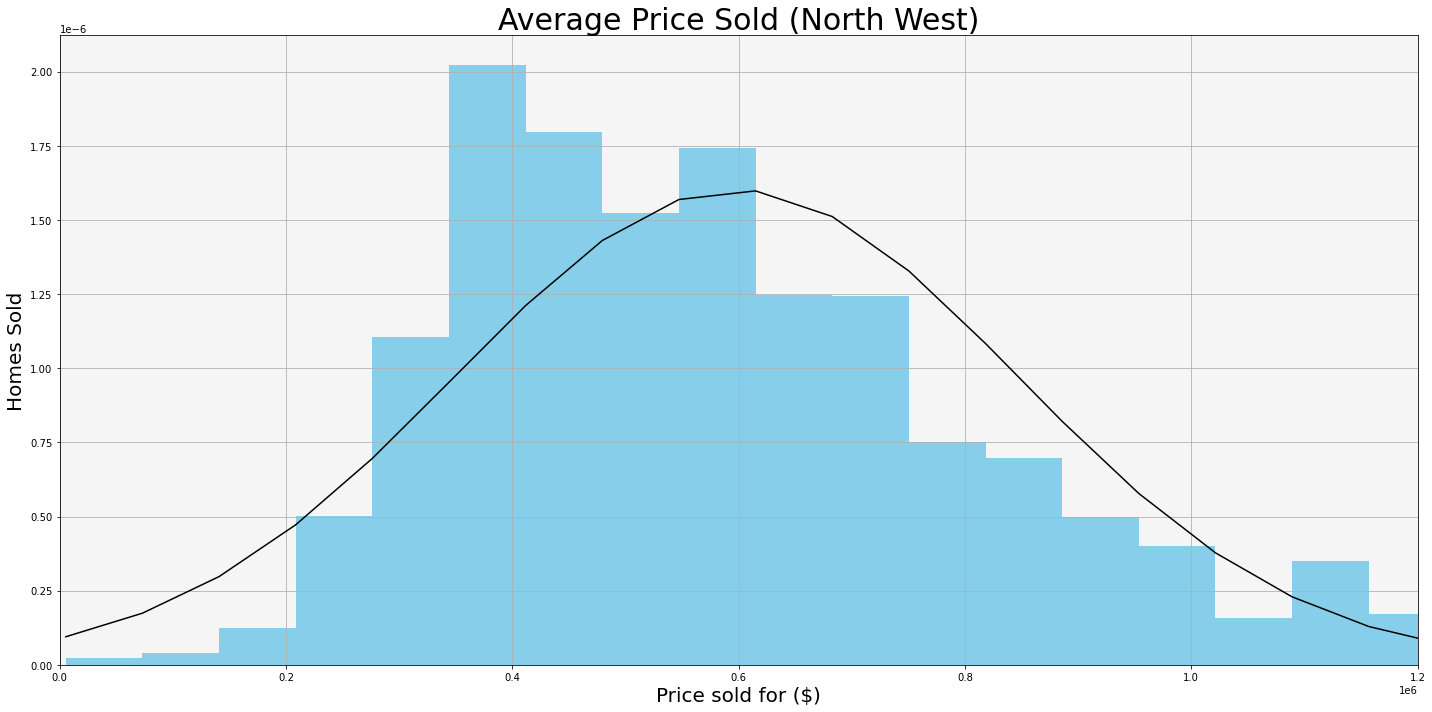

In [24]:
#NorthWest

plt.figure(figsize=(20,10))
plt.title('Average Price Sold (North West)',fontsize=30)
plt.xlabel('Price sold for ($)',fontsize=20)
plt.ylabel('Homes Sold',fontsize=20)
plt.xlim(0,1200000)
plt.grid()


_, bins, _ = plt.hist(northWestOut.latestPrice, 20,density=1, color='skyblue')
mu, sigma = norm.fit(northWestOut.latestPrice)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/NorthWest_Histogram.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-25-cc90b806c6aa>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


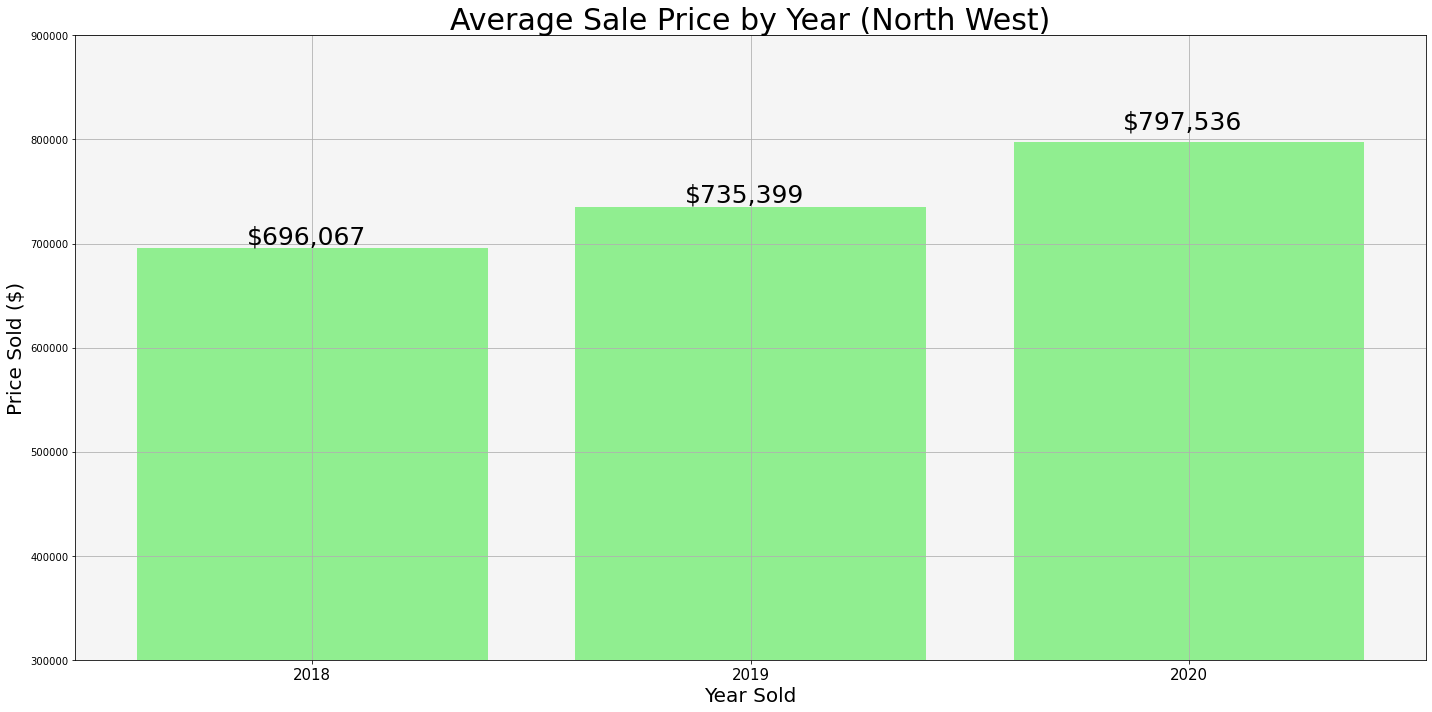

In [25]:
#NorthWest
averageSale = northWest.groupby(['latest_saleyear']).latestPrice.mean()
mask = averageSale.index != 2021
averageSale = averageSale[mask]
averageSale

mask = averageSale.index == 2018
eightAverage = averageSale[mask]
mean1 ="${:,.0f}".format(eightAverage.values[0])

mask = averageSale.index == 2019
nineAverage = averageSale[mask]
mean2 = "${:,.0f}".format(nineAverage.values[0])

mask = averageSale.index == 2020
zeroAverage = averageSale[mask]
mean3 = "${:,.0f}".format(zeroAverage.values[0])


plt.figure(figsize=(20,10))
plt.bar(averageSale.index,averageSale.values,color='lightgreen')
plt.title('Average Sale Price by Year (North West)',fontsize=30)
plt.xlabel('Year Sold',fontsize=20)
plt.ylabel('Price Sold ($)',fontsize=20)
plt.ylim(300000,900000)
plt.grid()
plt.xticks([2018,2019,2020],fontsize=15)
plt.annotate(f'{mean1}',(2017.85,700000),fontsize=25)
plt.annotate(f'{mean2}',(2018.85,740000),fontsize=25)
plt.annotate(f'{mean3}',(2019.85,810000),fontsize=25)
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/NorthWest_Average_Price.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<AxesSubplot:>

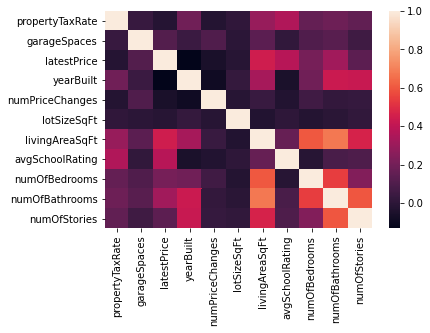

In [26]:
#NorthEast
northEastTrim = northEast[['propertyTaxRate','garageSpaces','latestPrice','yearBuilt','numPriceChanges','lotSizeSqFt','livingAreaSqFt','avgSchoolRating','numOfBedrooms','numOfBathrooms','numOfStories']]
corr = northEastTrim.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [27]:
#NorthEast


feature = northEast[['propertyTaxRate','livingAreaSqFt','lotSizeSqFt','numPriceChanges','numOfStories','numOfBedrooms','numOfBathrooms']]
target = northEast["latestPrice"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            latestPrice   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     185.9
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          1.66e-238
Time:                        17:07:10   Log-Likelihood:                -52959.
No. Observations:                3923   AIC:                         1.059e+05
Df Residuals:                    3915   BIC:                         1.060e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.577e+06   1.18e+05     13.374      0.000    1.35e+06    1.81e+06
propertyTaxRate  -6.92e+05      6e+04    -11.525      0.000    -8.1e+05   -5.74e+05
livingAreaSqFt    182.2386      6.994     26.056      0.000     168.526     195.951
lotSizeSqFt        -0.0002      0.006     -0.039      0.969      -0.013       0.012
numPriceChanges -6179.0545   1178.078     -5.245      0.000   -8488.760   -3869.349
numOfStories    -5.789e+04   7468.193     -7.751      0.000   -7.25e+04   -4.32e+04
numOfBedrooms   -3.266e+04   4535.225     -7.202      0.000   -4.16e+04   -2.38e+04
numOfBathrooms   3.435e+04   5801.841      5.920      0.000     2.3e+04    4.57e+04
==============================================================================
Omnibus:                     1717.095   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16926.370
Skew:                           1.822   Prob(JB):                         0.00
Kurtosis:                      12.501   Cond. No.                     2.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-28-be1c0c2b28e5>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


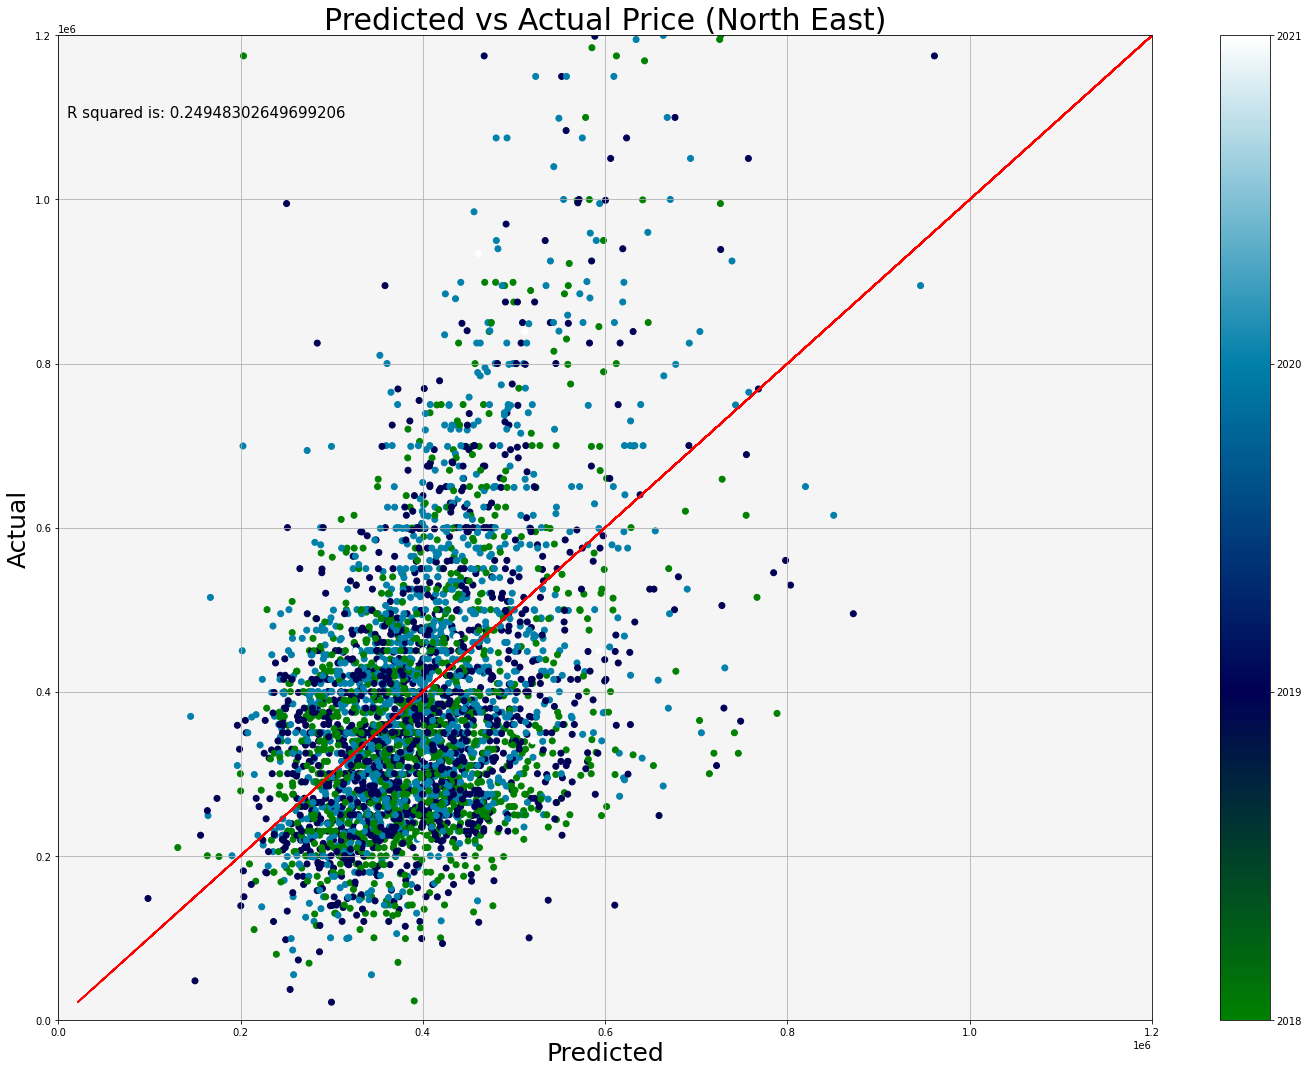

In [28]:
#NorthEast
plt.figure(figsize=(20,15))
weight = northEast.latest_saleyear
plt.scatter(results.fittedvalues, northEast.latestPrice,marker="o",c= weight,cmap='ocean')

plt.xlim(0,1200000)
plt.ylim(0,1200000)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual Price (North East)",fontsize=30)
plt.plot(northEast.latestPrice, northEast.latestPrice,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(10000,1100000),fontsize=15)
plt.colorbar(ticks=[2018,2019,2020,2021])
ax = plt.axes()
ax.set(facecolor='whitesmoke')
plt.grid()

path = '../output/NorthEast_Price_Regression.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-29-f79c56109c23>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


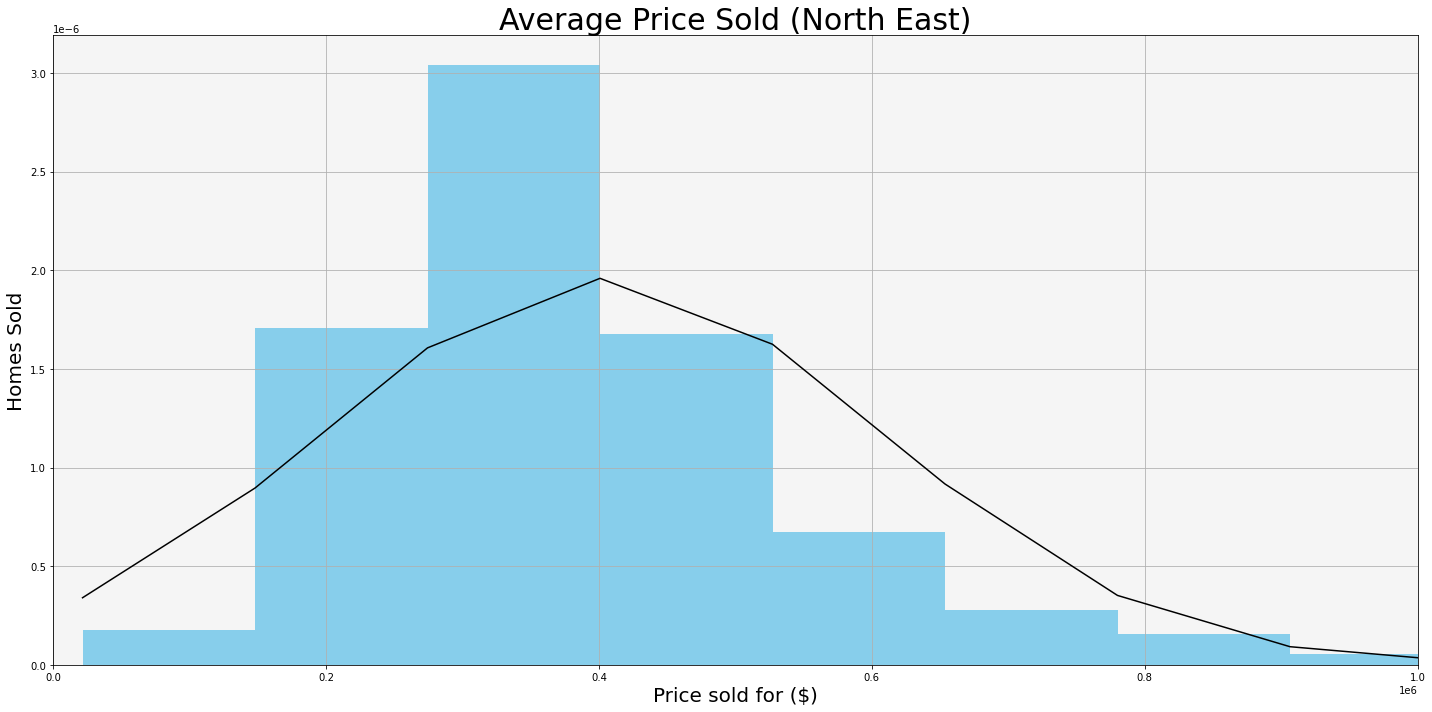

In [29]:
#NorthEast
plt.figure(figsize=(20,10))
plt.title('Average Price Sold (North East)',fontsize=30)
plt.xlabel('Price sold for ($)',fontsize=20)
plt.ylabel('Homes Sold',fontsize=20)
plt.xlim(0,1000000)
plt.grid()


_, bins, _ = plt.hist(northEast.latestPrice, 20,density=1, color='skyblue')
mu, sigma = norm.fit(northEast.latestPrice)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/NorthEast_Histogram.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-30-216614f935c9>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


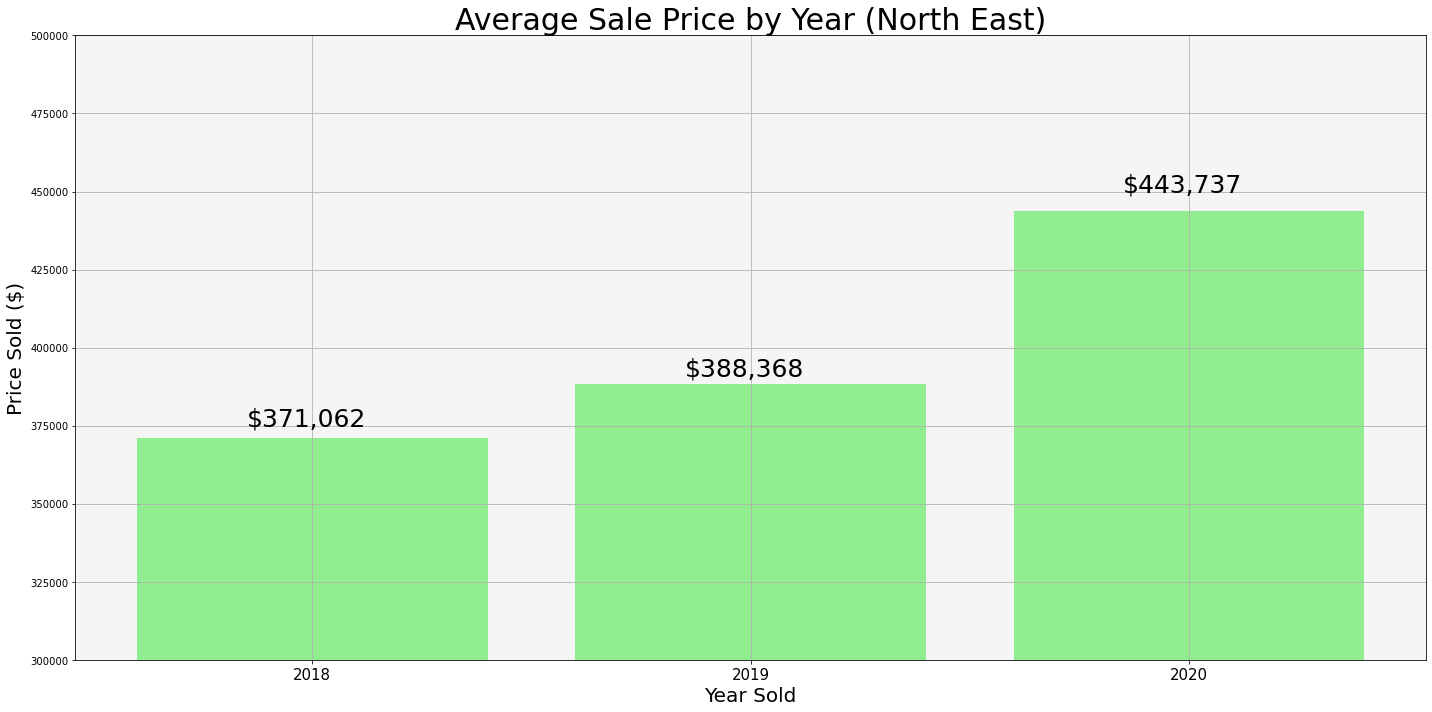

In [30]:
#NorthEast
averageSale = northEast.groupby(['latest_saleyear']).latestPrice.mean()
mask = averageSale.index != 2021
averageSale = averageSale[mask]
averageSale

mask = averageSale.index == 2018
eightAverage = averageSale[mask]
mean1 ="${:,.0f}".format(eightAverage.values[0])

mask = averageSale.index == 2019
nineAverage = averageSale[mask]
mean2 = "${:,.0f}".format(nineAverage.values[0])

mask = averageSale.index == 2020
zeroAverage = averageSale[mask]
mean3 = "${:,.0f}".format(zeroAverage.values[0])


plt.figure(figsize=(20,10))
plt.bar(averageSale.index,averageSale.values,color='lightgreen')
plt.title('Average Sale Price by Year (North East)',fontsize=30)
plt.xlabel('Year Sold',fontsize=20)
plt.ylabel('Price Sold ($)',fontsize=20)
plt.ylim(300000,500000)
plt.grid()
plt.xticks([2018,2019,2020],fontsize=15)
plt.annotate(f'{mean1}',(2017.85,375000),fontsize=25)
plt.annotate(f'{mean2}',(2018.85,391000),fontsize=25)
plt.annotate(f'{mean3}',(2019.85,450000),fontsize=25)
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/NorthEast_Average_Price.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<AxesSubplot:>

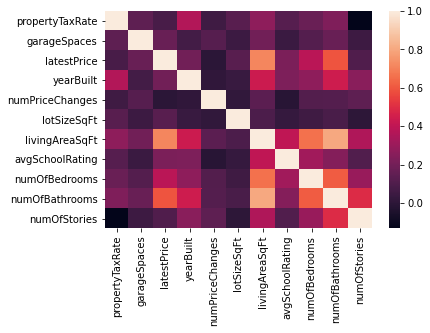

In [314]:
#SouthWest
southWestTrim = southWest[['propertyTaxRate','garageSpaces','latestPrice','yearBuilt','numPriceChanges','lotSizeSqFt','livingAreaSqFt','avgSchoolRating','numOfBedrooms','numOfBathrooms','numOfStories']]
corr = southWestTrim.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [33]:
#SouthWest

feature = southWest[['propertyTaxRate','livingAreaSqFt','lotSizeSqFt','numPriceChanges','numOfStories','numOfBedrooms','numOfBathrooms']]
target = southWest["latestPrice"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            latestPrice   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     820.4
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:09:16   Log-Likelihood:                -52100.
No. Observations:                3825   AIC:                         1.042e+05
Df Residuals:                    3817   BIC:                         1.043e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.182e+07   6.66e+05     17.741      0.000    1.05e+07    1.31e+07
propertyTaxRate  -5.88e+06   3.36e+05    -17.498      0.000   -6.54e+06   -5.22e+06
livingAreaSqFt    240.5053      5.913     40.672      0.000     228.912     252.099
lotSizeSqFt         0.1259      0.019      6.490      0.000       0.088       0.164
numPriceChanges -9304.7535   1371.575     -6.784      0.000    -1.2e+04   -6615.664
numOfStories    -1.619e+05   7721.628    -20.966      0.000   -1.77e+05   -1.47e+05
numOfBedrooms   -6.341e+04   5843.419    -10.851      0.000   -7.49e+04   -5.19e+04
numOfBathrooms   8.112e+04   6150.813     13.188      0.000    6.91e+04    9.32e+04
==============================================================================
Omnibus:                     3629.105   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           386725.891
Skew:                           4.213   Prob(JB):                         0.00
Kurtosis:                      51.534   Cond. No.                     3.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-34-67db7e92cd05>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


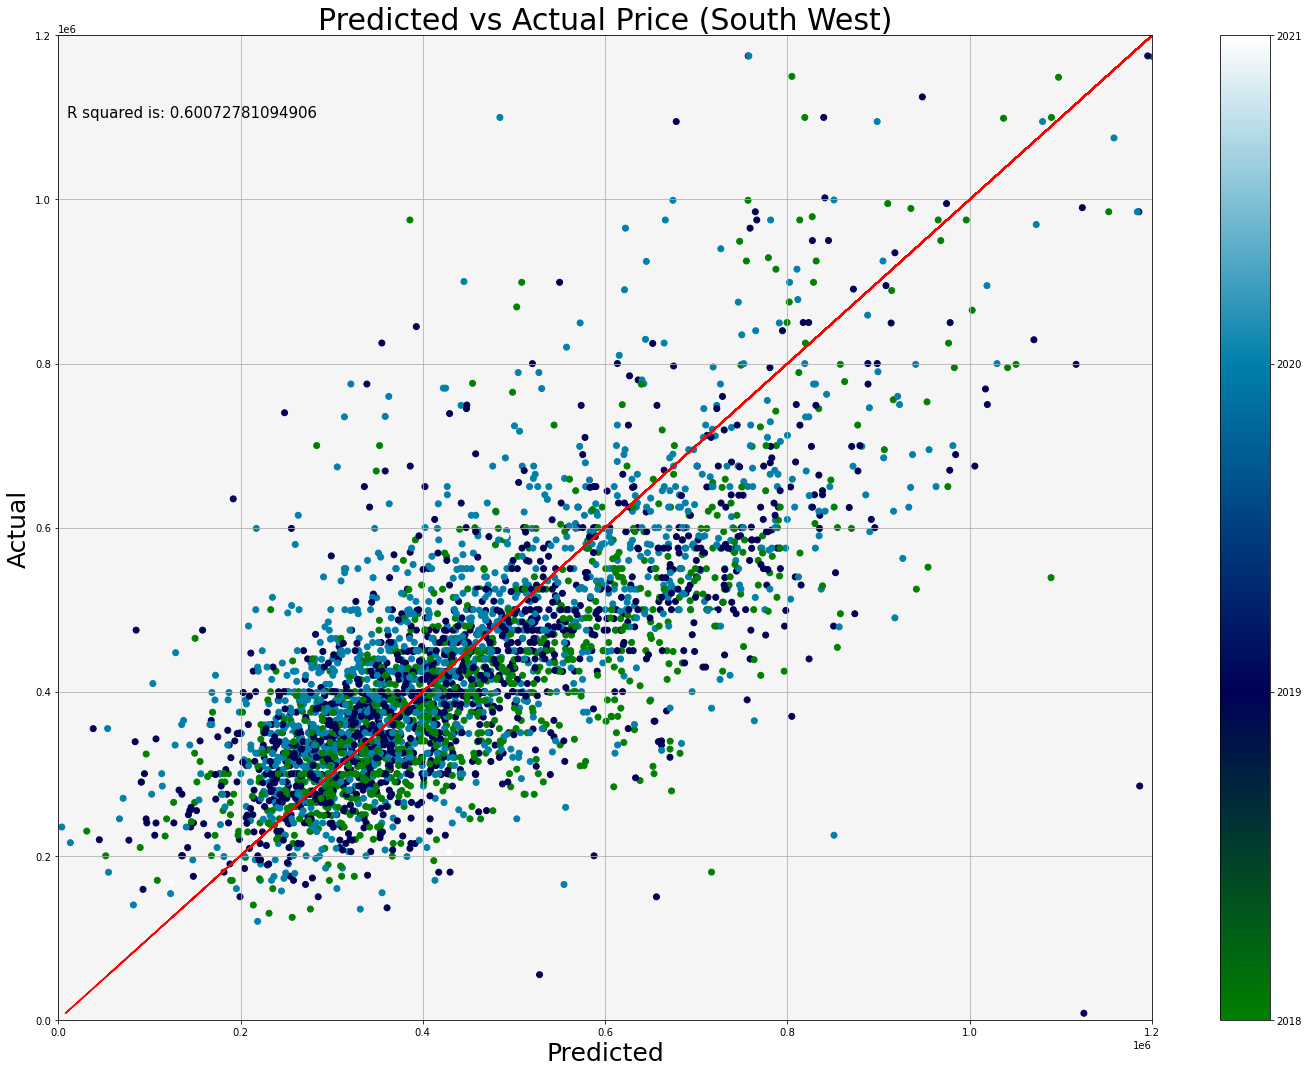

In [34]:
#SouthWest

plt.figure(figsize=(20,15))
weight = southWest.latest_saleyear
plt.scatter(results.fittedvalues, southWest.latestPrice,marker="o",c= weight,cmap='ocean')

plt.xlim(0,1200000)
plt.ylim(0,1200000)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual Price (South West)",fontsize=30)
plt.plot(southWest.latestPrice, southWest.latestPrice,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(10000,1100000),fontsize=15)
plt.colorbar(ticks=[2018,2019,2020,2021])
ax = plt.axes()
ax.set(facecolor='whitesmoke')
plt.grid()

path = '../output/SouthWest_Price_Regression.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-35-b6a603b7b557>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


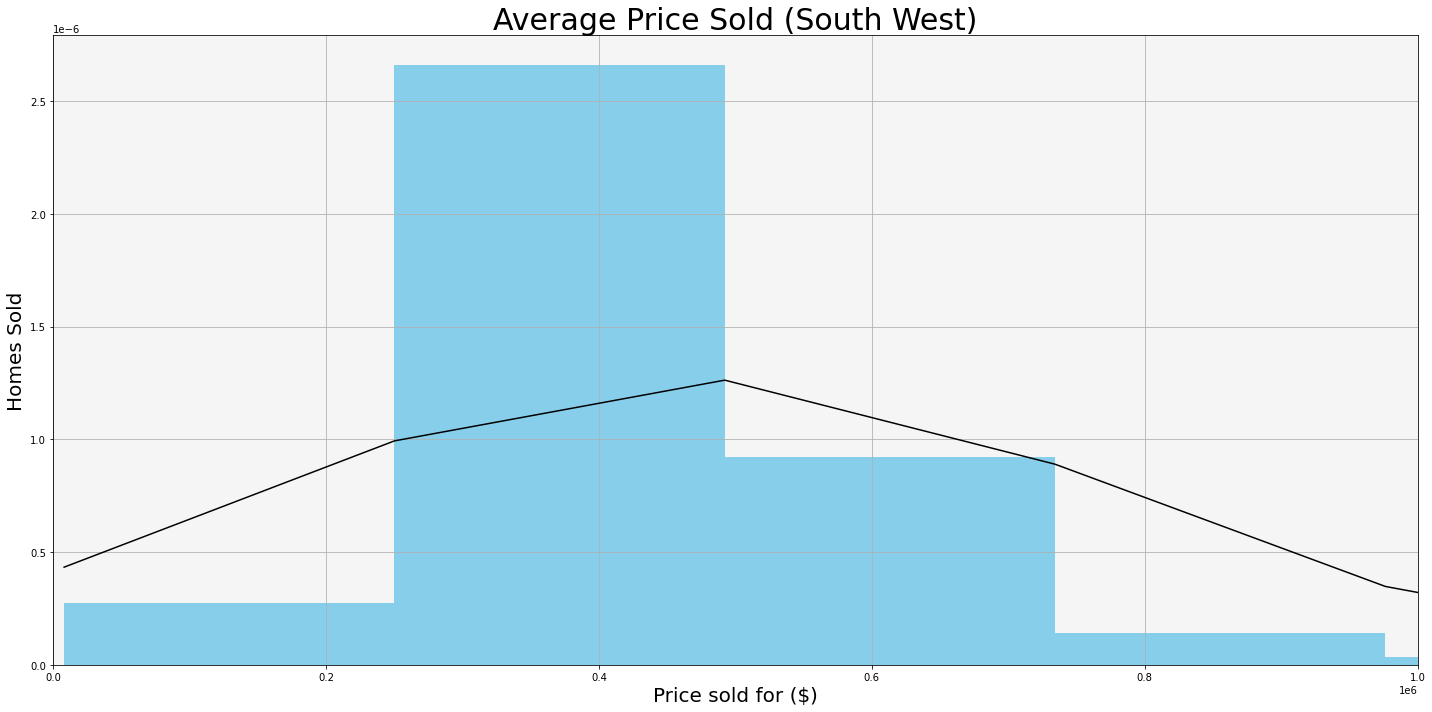

In [35]:
#SouthWest

plt.figure(figsize=(20,10))
plt.title('Average Price Sold (South West)',fontsize=30)
plt.xlabel('Price sold for ($)',fontsize=20)
plt.ylabel('Homes Sold',fontsize=20)
plt.xlim(0,1000000)
plt.grid()


_, bins, _ = plt.hist(southWest.latestPrice, 20,density=1, color='skyblue')
mu, sigma = norm.fit(southWest.latestPrice)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/SouthWest_Histogram.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-36-495ec1f8ed8f>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


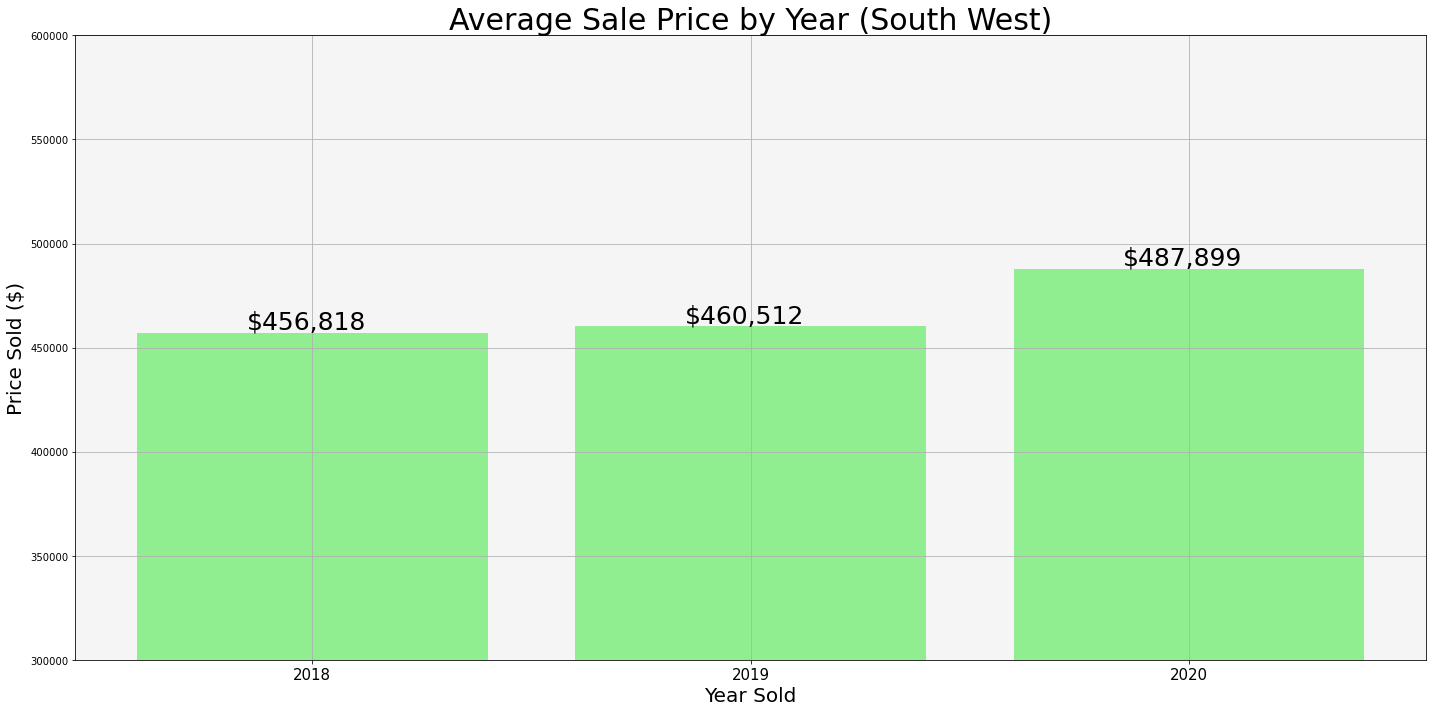

In [36]:
#SouthWest
averageSale = southWest.groupby(['latest_saleyear']).latestPrice.mean()
mask = averageSale.index != 2021
averageSale = averageSale[mask]
averageSale

mask = averageSale.index == 2018
eightAverage = averageSale[mask]
mean1 ="${:,.0f}".format(eightAverage.values[0])

mask = averageSale.index == 2019
nineAverage = averageSale[mask]
mean2 = "${:,.0f}".format(nineAverage.values[0])

mask = averageSale.index == 2020
zeroAverage = averageSale[mask]
mean3 = "${:,.0f}".format(zeroAverage.values[0])


plt.figure(figsize=(20,10))
plt.bar(averageSale.index,averageSale.values,color='lightgreen')
plt.title('Average Sale Price by Year (South West)',fontsize=30)
plt.xlabel('Year Sold',fontsize=20)
plt.ylabel('Price Sold ($)',fontsize=20)
plt.ylim(300000,600000)
plt.grid()
plt.xticks([2018,2019,2020],fontsize=15)
plt.annotate(f'{mean1}',(2017.85,459000),fontsize=25)
plt.annotate(f'{mean2}',(2018.85,462000),fontsize=25)
plt.annotate(f'{mean3}',(2019.85,490000),fontsize=25)
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/SouthWest_Average_Price.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<AxesSubplot:>

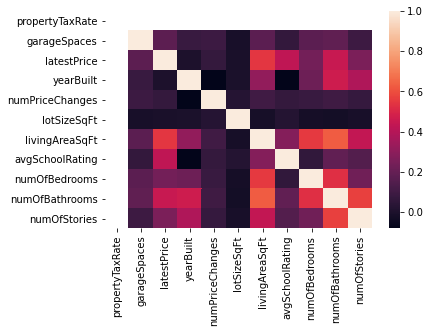

In [37]:
#SouthEast
southEastTrim = southEast[['propertyTaxRate','garageSpaces','latestPrice','yearBuilt','numPriceChanges','lotSizeSqFt','livingAreaSqFt','avgSchoolRating','numOfBedrooms','numOfBathrooms','numOfStories']]
corr = southEastTrim.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [38]:
#SouthEast

feature = southEast[['propertyTaxRate','livingAreaSqFt','lotSizeSqFt','numPriceChanges','numOfStories','numOfBedrooms','numOfBathrooms']]
target = southEast["latestPrice"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            latestPrice   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     327.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:10:00   Log-Likelihood:                -54972.
No. Observations:                3914   AIC:                         1.100e+05
Df Residuals:                    3907   BIC:                         1.100e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
propertyTaxRate  5.592e+04   1.11e+04      5.041      0.000    3.42e+04    7.77e+04
livingAreaSqFt    244.7400      8.778     27.881      0.000     227.530     261.950
lotSizeSqFt        -0.0002      0.009     -0.017      0.986      -0.018       0.017
numPriceChanges  1503.1969   2003.757      0.750      0.453   -2425.312    5431.706
numOfStories    -5.179e+04   1.13e+04     -4.580      0.000    -7.4e+04   -2.96e+04
numOfBedrooms   -7.552e+04   7638.540     -9.887      0.000   -9.05e+04   -6.05e+04
numOfBathrooms   1.047e+05   7890.533     13.263      0.000    8.92e+04     1.2e+05
==============================================================================
Omnibus:                     1591.753   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24634.367
Skew:                           1.517   Prob(JB):                         0.00
Kurtosis:                      14.910   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-39-d6ef94156745>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


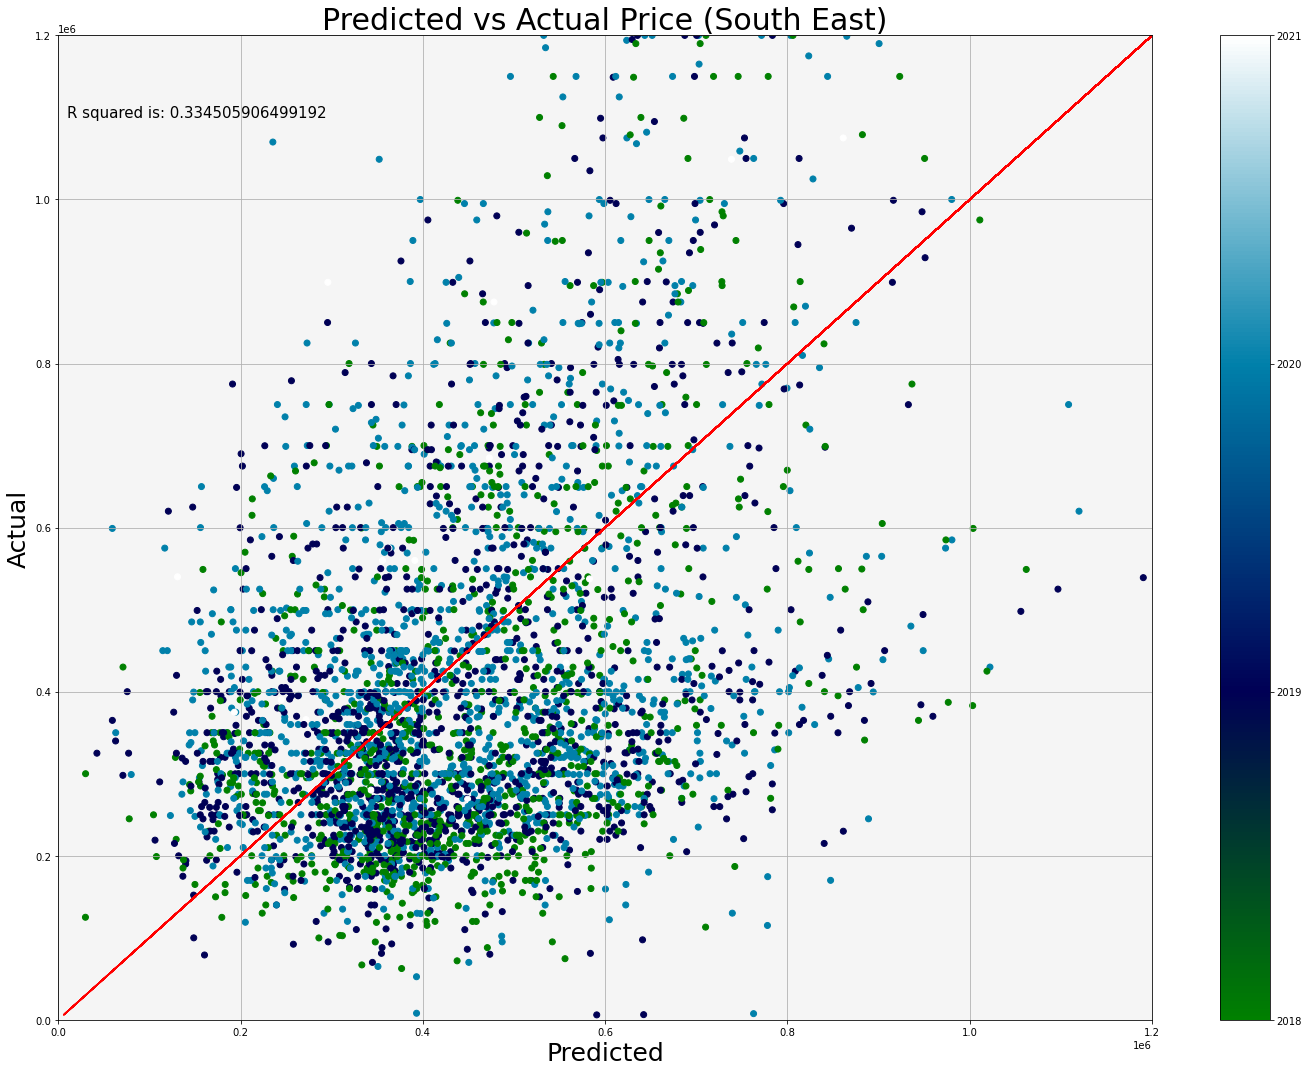

In [39]:
#SouthEast

plt.figure(figsize=(20,15))
weight = southEast.latest_saleyear
plt.scatter(results.fittedvalues, southEast.latestPrice,marker="o",c= weight,cmap='ocean')

plt.xlim(0,1200000)
plt.ylim(0,1200000)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual Price (South East)",fontsize=30)
plt.plot(southEast.latestPrice, southEast.latestPrice,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(10000,1100000),fontsize=15)
plt.colorbar(ticks=[2018,2019,2020,2021])
ax = plt.axes()
ax.set(facecolor='whitesmoke')
plt.grid()

path = '../output/SouthEast_Price_Regression.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-40-ad20bc8d9ee3>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


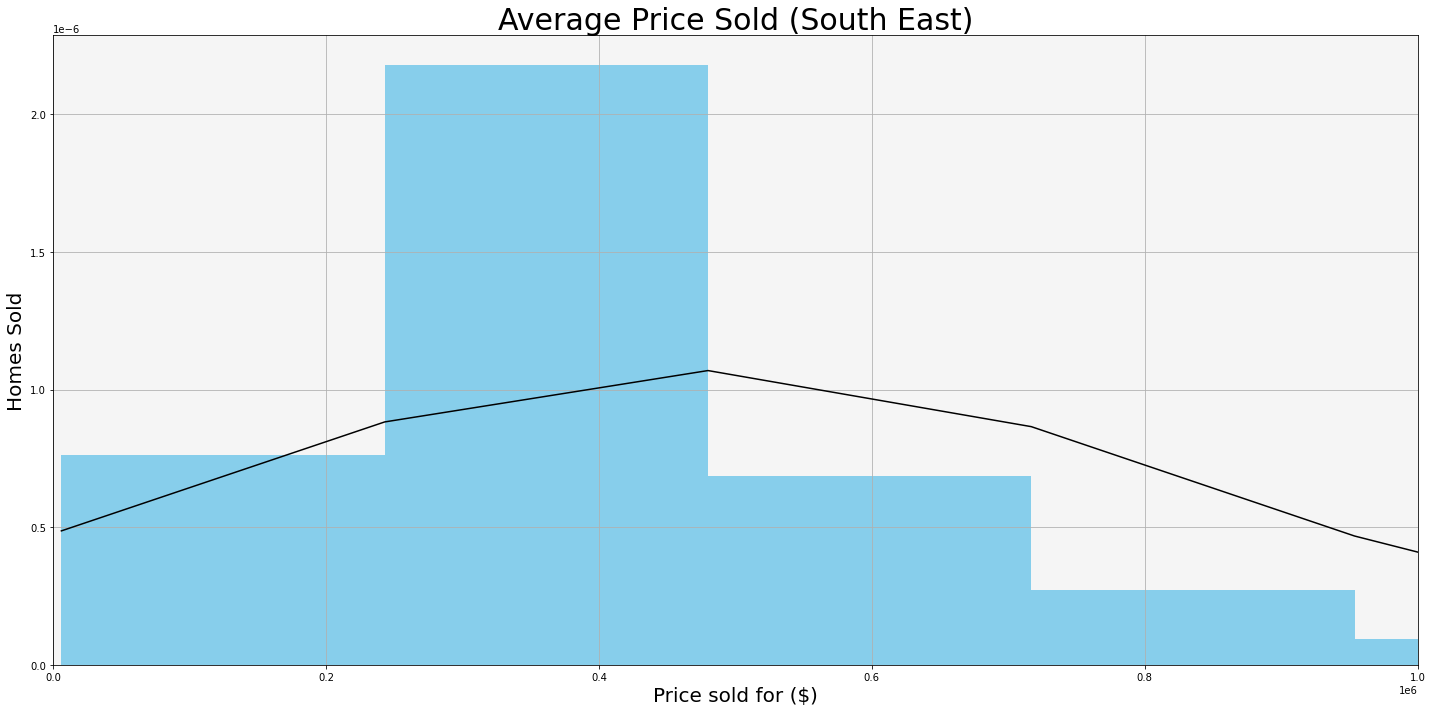

In [40]:
#SouthEast

plt.figure(figsize=(20,10))
plt.title('Average Price Sold (South East)',fontsize=30)
plt.xlabel('Price sold for ($)',fontsize=20)
plt.ylabel('Homes Sold',fontsize=20)
plt.xlim(0,1000000)
plt.grid()


_, bins, _ = plt.hist(southEast.latestPrice, 20,density=1, color='skyblue')
mu, sigma = norm.fit(southEast.latestPrice)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/SouthEast_Histogram.png'
plt.savefig(path)
plt.tight_layout()
plt.show()

<ipython-input-41-03dd4a74392a>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


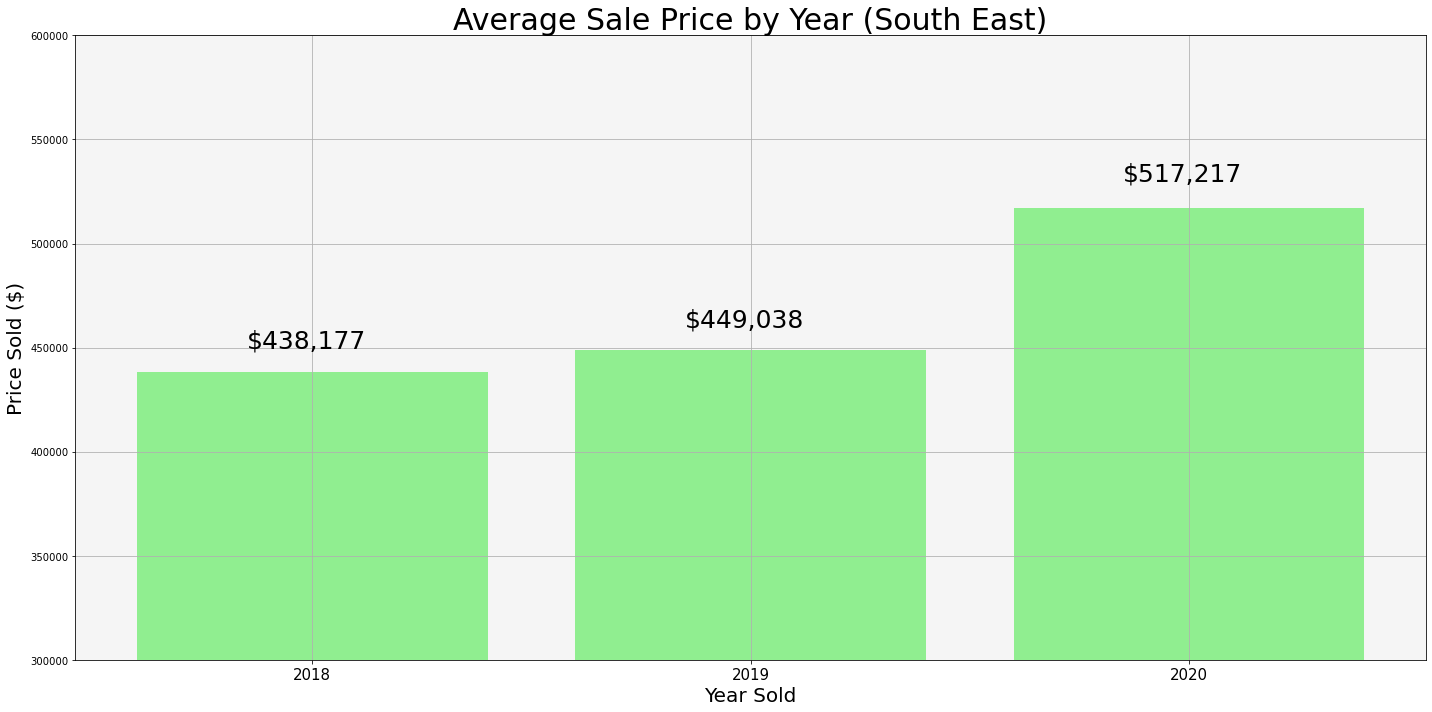

In [41]:
#SouthEast
averageSale = southEast.groupby(['latest_saleyear']).latestPrice.mean()
mask = averageSale.index != 2021
averageSale = averageSale[mask]
averageSale

mask = averageSale.index == 2018
eightAverage = averageSale[mask]
mean1 ="${:,.0f}".format(eightAverage.values[0])

mask = averageSale.index == 2019
nineAverage = averageSale[mask]
mean2 = "${:,.0f}".format(nineAverage.values[0])

mask = averageSale.index == 2020
zeroAverage = averageSale[mask]
mean3 = "${:,.0f}".format(zeroAverage.values[0])


plt.figure(figsize=(20,10))
plt.bar(averageSale.index,averageSale.values,color='lightgreen')
plt.title('Average Sale Price by Year (South East)',fontsize=30)
plt.xlabel('Year Sold',fontsize=20)
plt.ylabel('Price Sold ($)',fontsize=20)
plt.ylim(300000,600000)
plt.grid()
plt.xticks([2018,2019,2020],fontsize=15)
plt.annotate(f'{mean1}',(2017.85,450000),fontsize=25)
plt.annotate(f'{mean2}',(2018.85,460000),fontsize=25)
plt.annotate(f'{mean3}',(2019.85,530000),fontsize=25)
ax = plt.axes()
ax.set(facecolor='whitesmoke')

path = '../output/SouthEast_Average_Price.png'
plt.savefig(path)
plt.tight_layout()
plt.show()